In [1]:
%pip install kaggle
%pip install opendatasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

2024-08-22 15:57:13.406152: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 15:57:13.409119: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 15:57:13.449626: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 15:57:14.128022: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Descarga del conjunto de datos

 Sitio de donde se obtuvo la data: https://www.kaggle.com/datasets/agungpambudi/mnist-multiple-dataset-comprehensive-analysis/data
 Tomar en consideracion que son 874MB, así mismo, para poder descargar la data, utilice la info de mi perfil de Kaggle, pues requiere tu nombre de usuario y code. En este caso, dirigirse a "your profile" el nombre que aparece es tu user name, luego ir a "settings" y en s 
 y el "account number" que aparece es tu key. Igual, se subira el .zip para que no haya tanto problema

In [3]:
if not os.path.isdir('archive'):
    # URL corregida (sin espacios)
    od.download("https://www.kaggle.com/datasets/agungpambudi/mnist-multiple-dataset-comprehensive-analysis/data")
    # Ruta actual del archivo descargado con el nombre automático
    original_file_path = './mnist-multiple-dataset-comprehensive-analysis'

    # Ruta y nombre deseado
    new_file_path = './archive'
    
    # Renombrar el archivo
    os.rename(original_file_path, new_file_path)
# else:
#     # Si el directorio ya existe, extraer el archivo zip
#     with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#         zip_ref.extractall('archive')

# Prueba

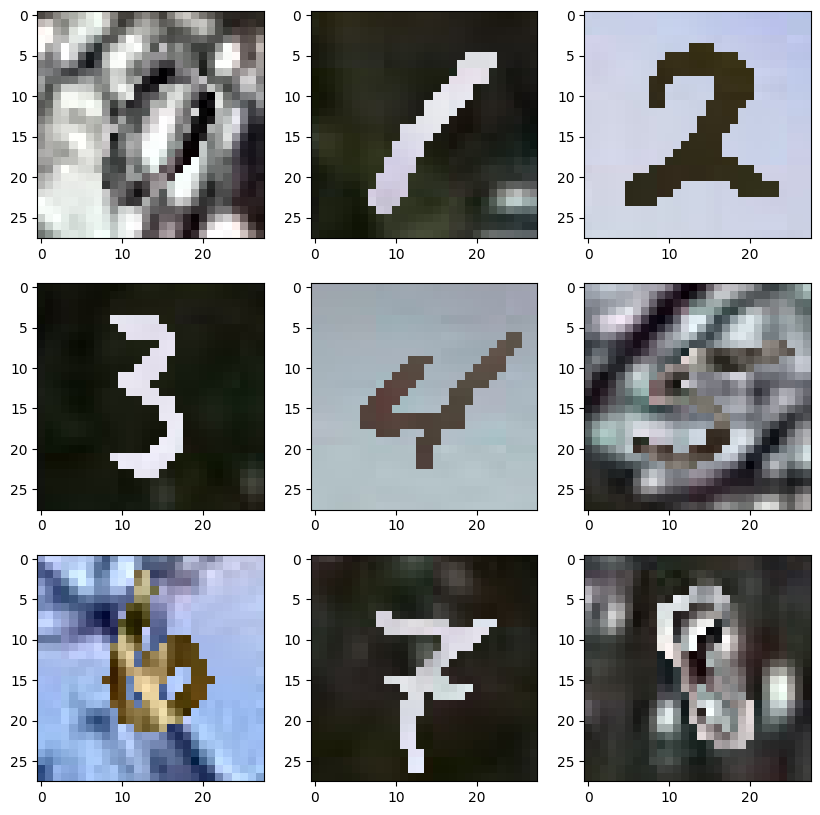

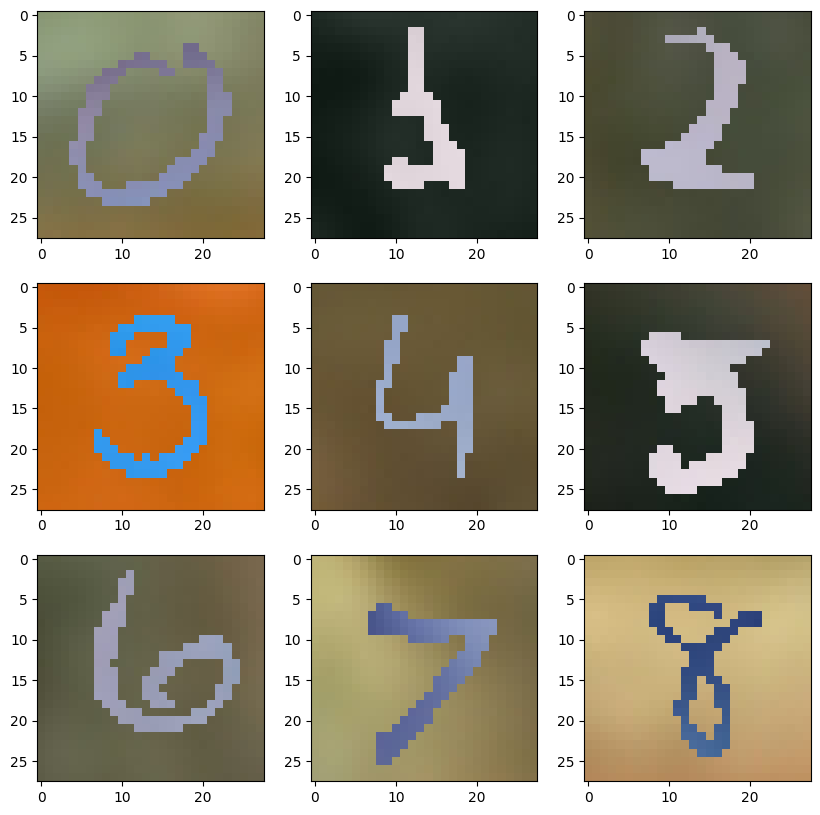

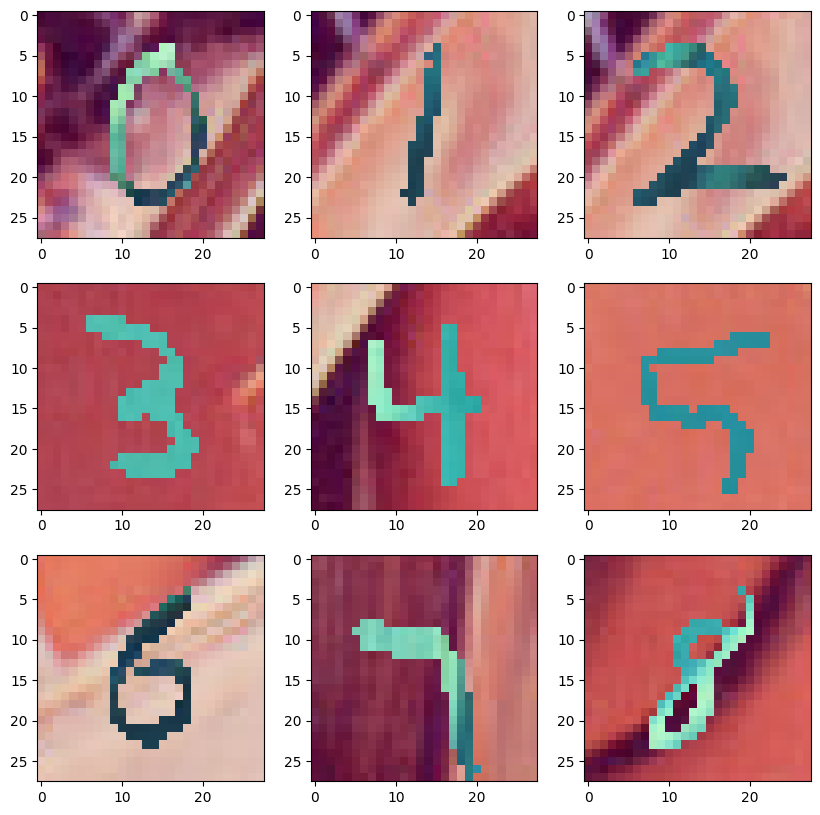

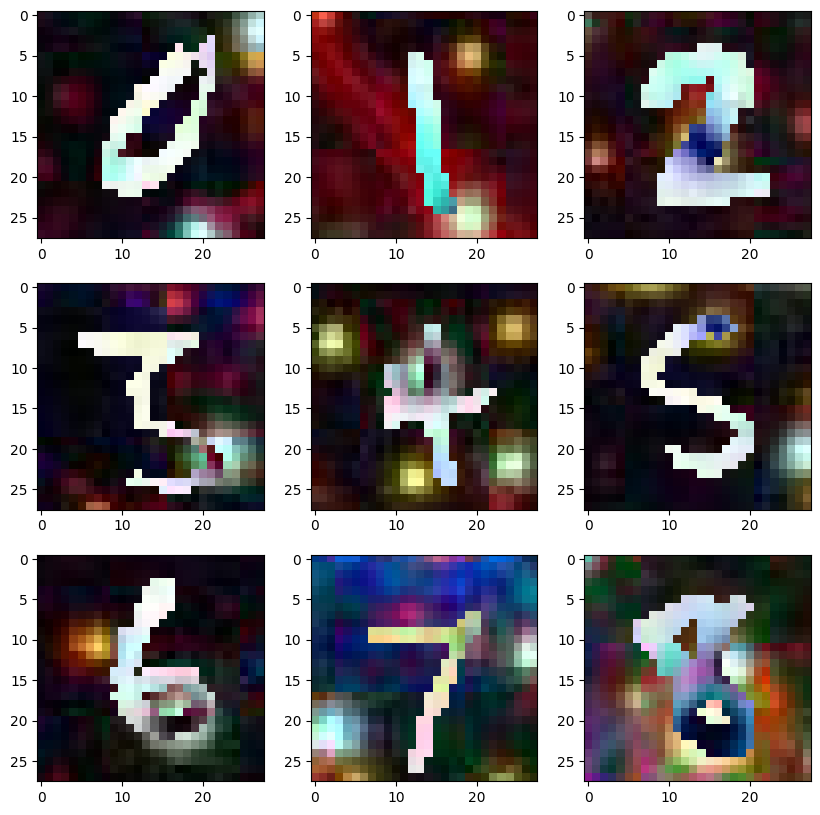

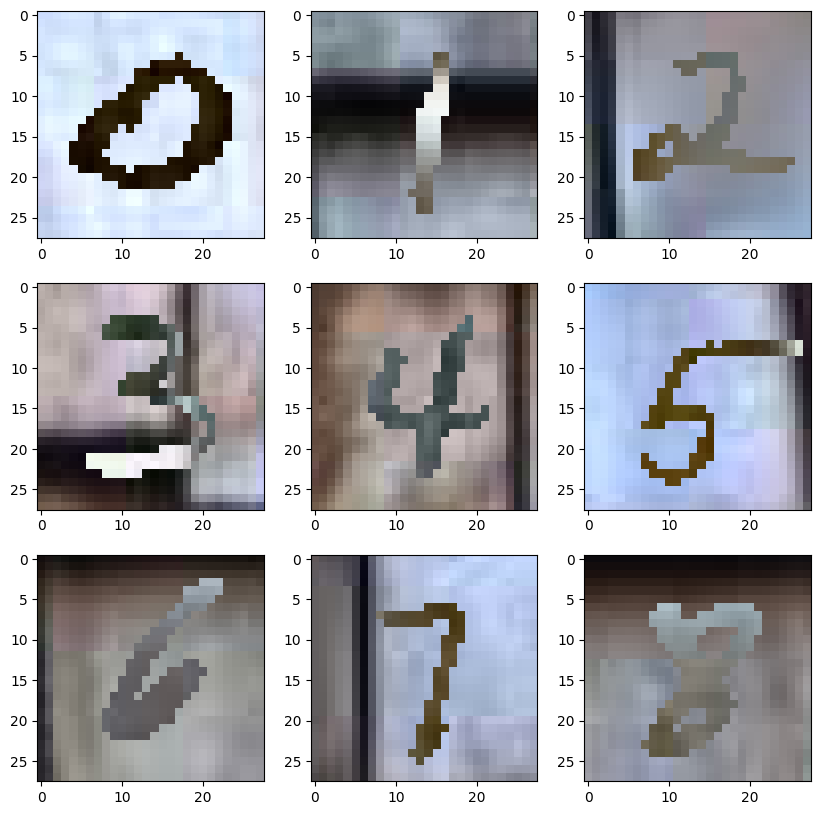

In [4]:
for n in range(5):
    folder_test_mo = f"./archive/PolyMNIST/MMNIST/test/m{str(n)}/"
    
    # Crear una nueva figura para cada valor de n
    plt.figure(figsize=(10, 10))
    
    # Mostrar 9 imágenes en una cuadrícula 3x3
    for i in range(9):
        plt.subplot(330+1+i)
        filename = folder_test_mo + str(i) + '.' + str(i) + '.png'
        image = imread(filename)
        plt.imshow(image)

    # Mostrar la figura
    plt.show()


# Entrenamiento

In [ ]:
for n in range(5):
    folder_test_mo = f"./archive/PolyMNIST/MMNIST/train/m{str(n)}/"
    
    # Crear una nueva figura para cada valor de n
    plt.figure(figsize=(10, 10))
    
    # Mostrar 9 imágenes en una cuadrícula 3x3
    for i in range(9):
        plt.subplot(330+1+i)
        filename = folder_test_mo + str(i) + '.' + str(i) + '.png'
        image = imread(filename)
        plt.imshow(image)

    # Mostrar la figura
    plt.show()

En Ambos casos, tanto para prueba y entrenamiento, se aprecia que tienen la misma resolucion, pero con diferenncia
de como se representa el valor numerico en si.

In [ ]:
# Estructura de carpetas

folder = "archive/PolyMNIST/MMNIST"
subdirs = ['train/', 'test/']
labeldirs = ['m0/', 'm1/', 'm2/', 'm3/', 'm4/']

In [ ]:
import numpy as np
import keras.preprocessing.image as kerasImg
import os

folder = "archive/PolyMNIST/MMNIST/"
subdirs = ['train/', 'test/']
labeldirs = ['m0/', 'm1/', 'm2/', 'm3/', 'm4/']

fotos_train = []
fotos_test = []
etiquetas_train = []
etiquetas_test = []

# Verificar directorios
print(f"Verificando directorio de entrenamiento: {folder + subdirs[0]}")
print(f"Verificando directorio de prueba: {folder + subdirs[1]}")

# Procesar el conjunto de entrenamiento
for dir in labeldirs:
    dir_path = folder + subdirs[0] + dir
    if os.path.exists(dir_path):
        print(f"Archivos en {dir_path}:")
        for file in os.listdir(dir_path):
            etiqueta = int(dir[1])  # Extraer el número de la etiqueta
            try:
                imagen = kerasImg.load_img(os.path.join(dir_path, file), target_size=(200,200))
                imagen = kerasImg.img_to_array(imagen)
                fotos_train.append(imagen)
                etiquetas_train.append(etiqueta)
            except Exception as e:
                print(f"Error al cargar la imagen {file}: {e}")
    else:
        print(f"El directorio {dir_path} no existe.")

# Procesar el conjunto de prueba
for dir in labeldirs:
    dir_path = folder + subdirs[1] + dir
    if os.path.exists(dir_path):
        print(f"Archivos en {dir_path}:")
        for file in os.listdir(dir_path):
            etiqueta = int(dir[1])  # Extraer el número de la etiqueta
            try:
                imagen = kerasImg.load_img(os.path.join(dir_path, file), target_size=(200,200))
                imagen = kerasImg.img_to_array(imagen)
                fotos_test.append(imagen)
                etiquetas_test.append(etiqueta)
            except Exception as e:
                print(f"Error al cargar la imagen {file}: {e}")
    else:
        print(f"El directorio {dir_path} no existe.")

# Convertir a arreglos de NumPy
fotos_train = np.asarray(fotos_train)
etiquetas_train = np.asarray(etiquetas_train)
fotos_test = np.asarray(fotos_test)
etiquetas_test = np.asarray(etiquetas_test)

print(f"Entrenamiento: {fotos_train.shape}, {etiquetas_train.shape}")
print(f"Prueba: {fotos_test.shape}, {etiquetas_test.shape}")
